In [1]:
import os 
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x) 

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir('C:\\Users\\rhian\\Downloads\\CYPLAN 255\\AP-Exams\\Data')
ap = pd.read_csv('ap_full.csv')
ap

,year,ncessch,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,school_name,AP_oneormore_relative,teachers_per_student,security_gaurds_per_students,avg_teacher_salary,%Asian,%Black,%Hispanic,%Indigenous \nAmerican,%Multiracial,%Pacific \nIslander,%White,%Female,%Male,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_report_harass_dis,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,students_arrested,avg_teacher_salary_1K
0,2011,60000103278.0000,89.0000,42.0000,34.4936,-118.2161,513.0000,VASQUEZ HIGH,0.0819,0.0484,0.0027,77612.6500,0.0137,0.0078,0.2832,0.0078,0.0254,0.0039,0.6582,0.4785,0.5215,0.2578,0.0820,0.0234,0.0664,0.1607,0.0488,0.0820,0.0000,0.0000,0.0762,0.0449,0.0000,77.6126
1,2011,60000310347.0000,13.0000,2.0000,37.5596,-121.9630,420.0000,CALIFORNIA SCHOOL FOR THE DEAF-FREMONT,0.0048,0.3147,0.0000,84851.5765,0.0831,0.0966,0.4202,0.0090,0.0292,0.0090,0.3528,0.4831,0.5169,0.0292,0.0000,0.0225,0.0225,0.0781,0.0652,0.2382,0.0090,0.0292,0.1079,0.0742,0.0000,84.8516
2,2011,60001302405.0000,11.0000,483.0000,38.8136,-121.2535,1843.0000,ROCKLIN HIGH,0.2621,0.0449,0.0000,51197.7241,0.0463,0.0087,0.1494,0.0055,0.0676,0.0267,0.6957,0.5115,0.4885,0.2775,0.1080,0.0943,0.2170,0.1603,0.2285,0.0769,0.0000,0.1499,0.0098,0.0578,0.0000,51.1977
3,2011,60001311010.0000,0.0000,424.0000,38.8364,-121.2894,1777.0000,WHITNEY HIGH,0.2386,0.0461,0.0000,54703.3611,0.0683,0.0209,0.1361,0.0056,0.0531,0.0395,0.6765,0.5042,0.4958,0.2400,0.0604,0.0401,0.1355,0.0966,0.1846,0.0768,0.0000,0.0423,0.0344,0.0073,0.0011,54.7034
4,2011,60001609086.0000,319.0000,439.0000,34.1047,-117.6575,3557.0000,UPLAND HIGH,0.1234,0.0421,0.0028,75420.2602,0.0549,0.0839,0.4693,0.0047,0.0276,0.0241,0.3356,0.4969,0.5031,0.2247,0.0748,0.0722,0.1464,0.1405,0.1349,0.1000,0.0000,0.0000,0.0493,0.0106,0.0000,75.4203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456,2017,69113511047.0000,78.0000,826.0000,33.8562,-117.3305,2062.0000,Citrus Hill High,0.4006,0.0422,0.0024,79084.1264,0.0112,0.0810,0.8389,0.0024,0.0136,0.0039,0.0490,0.4716,0.5284,0.4386,0.1179,0.1383,0.4090,0.1980,0.4653,0.0150,0.0000,0.0000,0.0505,0.0107,0.0000,79.0841
4457,2017,69113512749.0000,7.0000,9.0000,33.8858,-117.2238,123.0000,Val Verde Academy,0.0732,0.0569,0.0081,50507.7143,0.0242,0.2016,0.6371,0.0000,0.0242,0.0081,0.1048,0.5161,0.4839,0.1290,0.0242,0.0348,0.1048,0.1290,0.1452,0.0565,0.0000,0.0000,0.0000,0.0000,0.0000,50.5077
4458,2017,69113513992.0000,15.0000,303.0000,33.8145,-117.1989,1652.0000,Orange Vista High,0.1834,0.0412,0.0036,77925.1765,0.0248,0.1320,0.7815,0.0042,0.0157,0.0042,0.0375,0.4619,0.5381,0.1937,0.0248,0.0103,0.1883,0.1586,0.2343,0.1642,0.0000,0.0000,0.0684,0.0230,0.0000,77.9252
4459,2017,69113603761.0000,18.0000,22.0000,36.8810,-121.5559,357.0000,Anzar High,0.0616,0.0560,0.0028,70787.1875,0.0140,0.0084,0.6955,0.0028,0.0112,0.0000,0.2737,0.4525,0.5475,0.1145,0.0291,0.0391,0.0754,0.1136,0.1061,0.0810,0.0000,0.0000,0.0000,0.0447,0.0000,70.7872


In [3]:
# ap['AP_oneormore_relative'] = ap['AP_oneormore_relative'] / 100

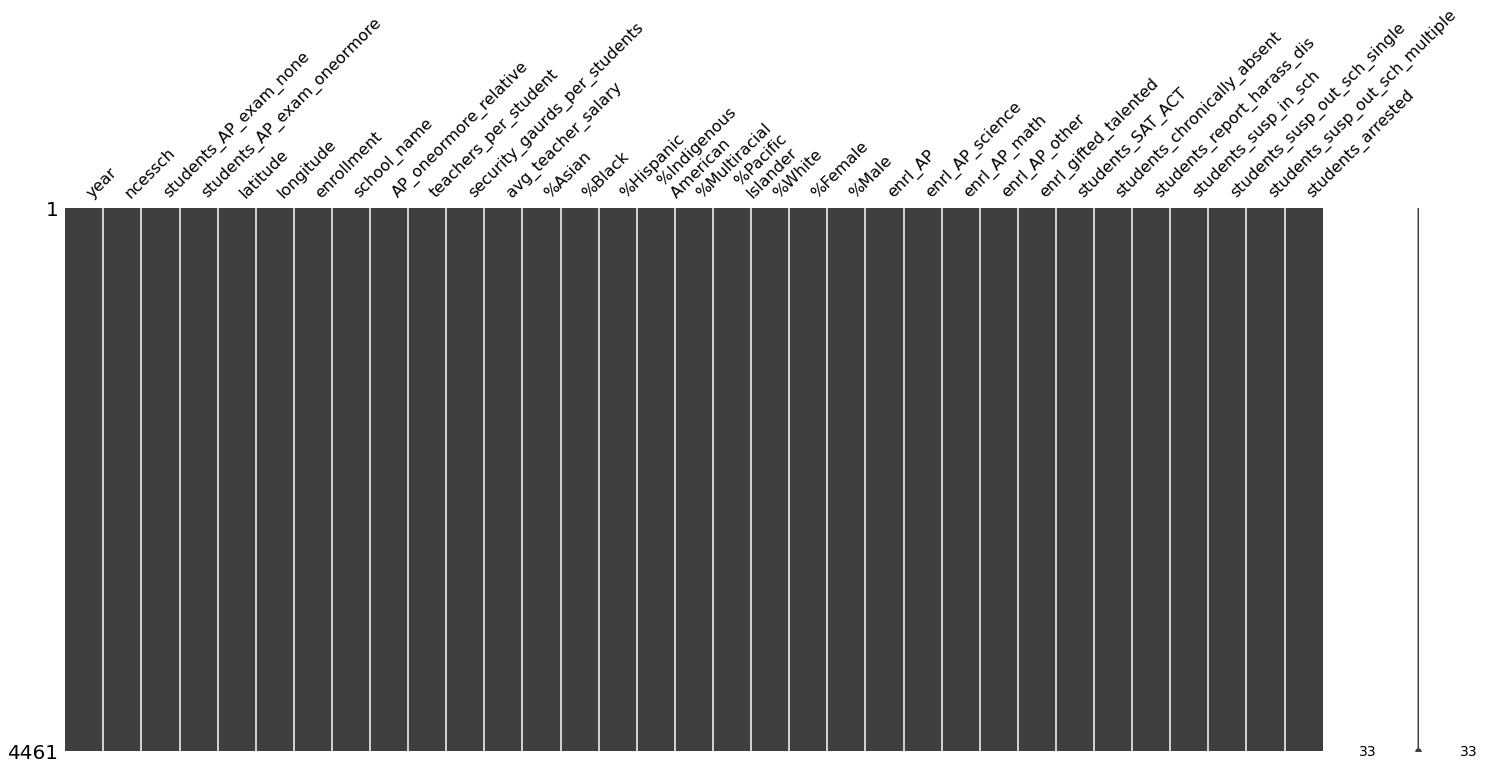

In [7]:
msno.matrix(ap);

In [5]:
ap_correlation = ap[['AP_oneormore_relative','students_AP_exam_oneormore','year', 
                     'enrollment','%Asian','%Black', '%Hispanic', 
                     '%Indigenous \nAmerican ', '%Multiracial','%Pacific \nIslander', 
                     '%White', '%Female', '%Male',
                     'enrl_AP','enrl_AP_science', 'enrl_AP_math', 'enrl_AP_other',
                     'enrl_gifted_talented', 'students_SAT_ACT',
                     'teachers_per_student','avg_teacher_salary','security_gaurds_per_students',
                     'students_chronically_absent', 'students_report_harass_dis',
                     'students_susp_in_sch', 'students_susp_out_sch_single',
                     'students_susp_out_sch_multiple', 'students_arrested',
                     'latitude', 'longitude']]

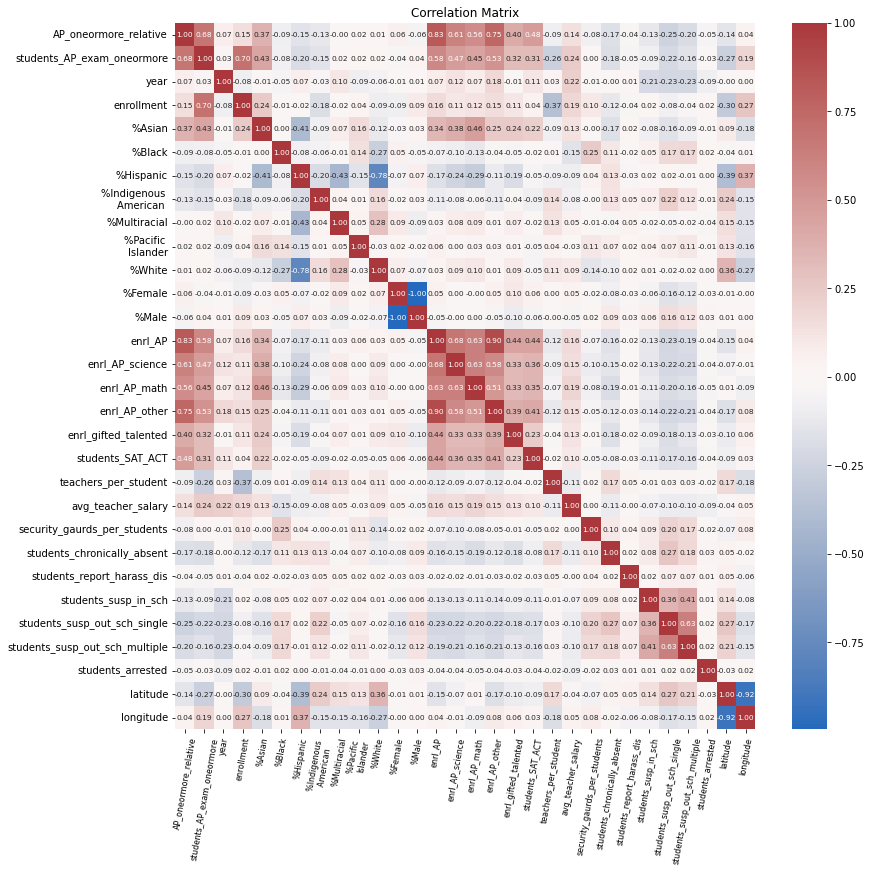

In [21]:
fig, ax = plt.subplots(figsize=(13,13)) 
correlation_mat = ap_correlation.corr()
g=sns.heatmap(correlation_mat, annot = True, ax=ax, annot_kws={"fontsize":7.5}, fmt='.2f', cmap='vlag') # icefire, coolwarm, vlag
ax.set_xticklabels(g.get_xticklabels(), rotation = 80, fontsize = 8)
plt.title("Correlation Matrix") 
plt.show()

# Scatterplots 

In [26]:
# ap['avg_teacher_salary_1K'] = ap['avg_teacher_salary'] / 1000

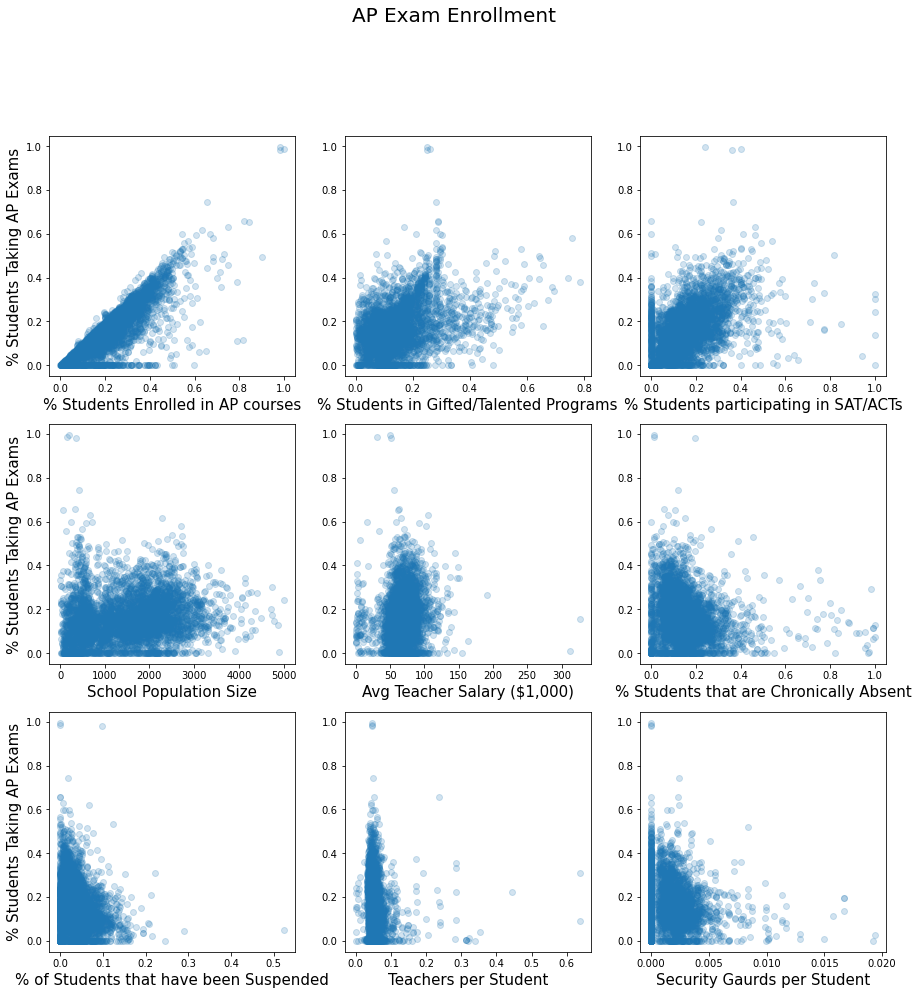

In [15]:
fig,ax = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("AP Exam Enrollment", y=1.0, fontsize=20)

ax[0,0].scatter(ap['enrl_AP'], ap['AP_oneormore_relative'], alpha=0.2)
ax[0,0].set_xlabel("% Students Enrolled in AP courses", fontsize = 15)
ax[0,0].set_ylabel("% Students Taking AP Exams", fontsize = 15)

ax[0,1].scatter(ap['enrl_gifted_talented'], ap['AP_oneormore_relative'], alpha=0.2)
ax[0,1].set_xlabel("% Students in Gifted/Talented Programs", fontsize = 15)

ax[0,2].scatter(ap['students_SAT_ACT'], ap['AP_oneormore_relative'], alpha=0.2)
ax[0,2].set_xlabel("% Students participating in SAT/ACTs", fontsize = 15)

ax[1,0].scatter(ap['enrollment'], ap['AP_oneormore_relative'], alpha=0.2)
ax[1,0].set_xlabel("School Population Size", fontsize = 15)
ax[1,0].set_ylabel("% Students Taking AP Exams", fontsize = 15)

ax[1,1].scatter(ap['avg_teacher_salary_1K'], ap['AP_oneormore_relative'], alpha=0.2)
ax[1,1].set_xlabel("Avg Teacher Salary ($1,000)", fontsize = 15)

ax[1,2].scatter(ap['students_chronically_absent'], ap['AP_oneormore_relative'], alpha=0.2)
ax[1,2].set_xlabel("% Students that are Chronically Absent", fontsize = 15)

ax[2,0].scatter(ap['students_susp_out_sch_single'], ap['AP_oneormore_relative'], alpha=0.2)
ax[2,0].set_xlabel("% of Students that have been Suspended", fontsize = 15)
ax[2,0].set_ylabel("% Students Taking AP Exams", fontsize = 15)

ax[2,1].scatter(ap['teachers_per_student'], ap['AP_oneormore_relative'], alpha=0.2)
ax[2,1].set_xlabel("Teachers per Student", fontsize = 15)

ax[2,2].scatter(ap['security_gaurds_per_students'], ap['AP_oneormore_relative'], alpha=0.2)
ax[2,2].set_xlabel("Security Gaurds per Student", fontsize = 15);


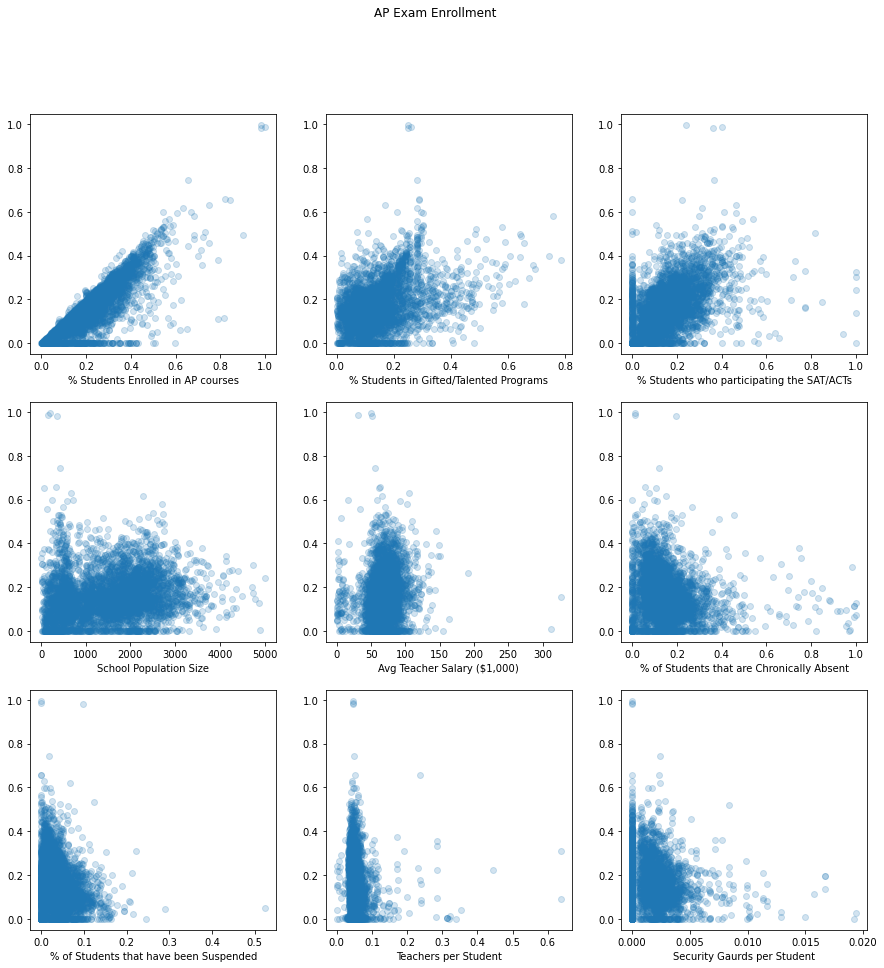

In [6]:
fig,ax = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("AP Exam Enrollment")

ax[0,0].scatter(ap['enrl_AP'], ap['AP_oneormore_relative'], alpha=0.2)
ax[0,0].set_xlabel("% Students Enrolled in AP courses")

ax[0,1].scatter(ap['enrl_gifted_talented'], ap['AP_oneormore_relative'], alpha=0.2)
ax[0,1].set_xlabel("% Students in Gifted/Talented Programs")

ax[0,2].scatter(ap['students_SAT_ACT'], ap['AP_oneormore_relative'], alpha=0.2)
ax[0,2].set_xlabel("% Students who participating the SAT/ACTs")

ax[1,0].scatter(ap['enrollment'], ap['AP_oneormore_relative'], alpha=0.2)
ax[1,0].set_xlabel("School Population Size")

ax[1,1].scatter(ap['avg_teacher_salary_1K'], ap['AP_oneormore_relative'], alpha=0.2)
ax[1,1].set_xlabel("Avg Teacher Salary ($1,000)")

ax[1,2].scatter(ap['students_chronically_absent'], ap['AP_oneormore_relative'], alpha=0.2)
ax[1,2].set_xlabel("% of Students that are Chronically Absent")

ax[2,0].scatter(ap['students_susp_out_sch_single'], ap['AP_oneormore_relative'], alpha=0.2)
ax[2,0].set_xlabel("% of Students that have been Suspended")

ax[2,1].scatter(ap['teachers_per_student'], ap['AP_oneormore_relative'], alpha=0.2)
ax[2,1].set_xlabel("Teachers per Student")

ax[2,2].scatter(ap['security_gaurds_per_students'], ap['AP_oneormore_relative'], alpha=0.2)
ax[2,2].set_xlabel("Security Gaurds per Student");


In [45]:
# imputing SAT_ACT with enrl_AP 
def impute(dataframe, imputing_col, quantile_col): 
    dataframe['AP_quantiles'] = pd.qcut(dataframe[quantile_col].rank(method='first'), 
                                                  100, labels=range(1, 101))
    
    impute_quantiles = dataframe.groupby('AP_quantiles')[imputing_col].mean()
    
    for i in range(0, dataframe.shape[0]): 
        if (np.isnan(dataframe[imputing_col][i])): 
            quantile = dataframe['AP_quantiles'][i]
            dataframe[imputing_col][i] = impute_quantiles[quantile-1]
    
    dataframe = dataframe.drop(['AP_quantiles'], axis =1)
    
    return dataframe 

In [49]:
# for i in [185, 187, 188, 189, 190, 191, 623, 1984]: 
#     ap['students_SAT_ACT'][i] = np.nan
    
# ap = impute(ap, 'students_SAT_ACT', 'enrl_AP')

In [62]:
# ap['teachers_per_student'][3624] = 36/1074

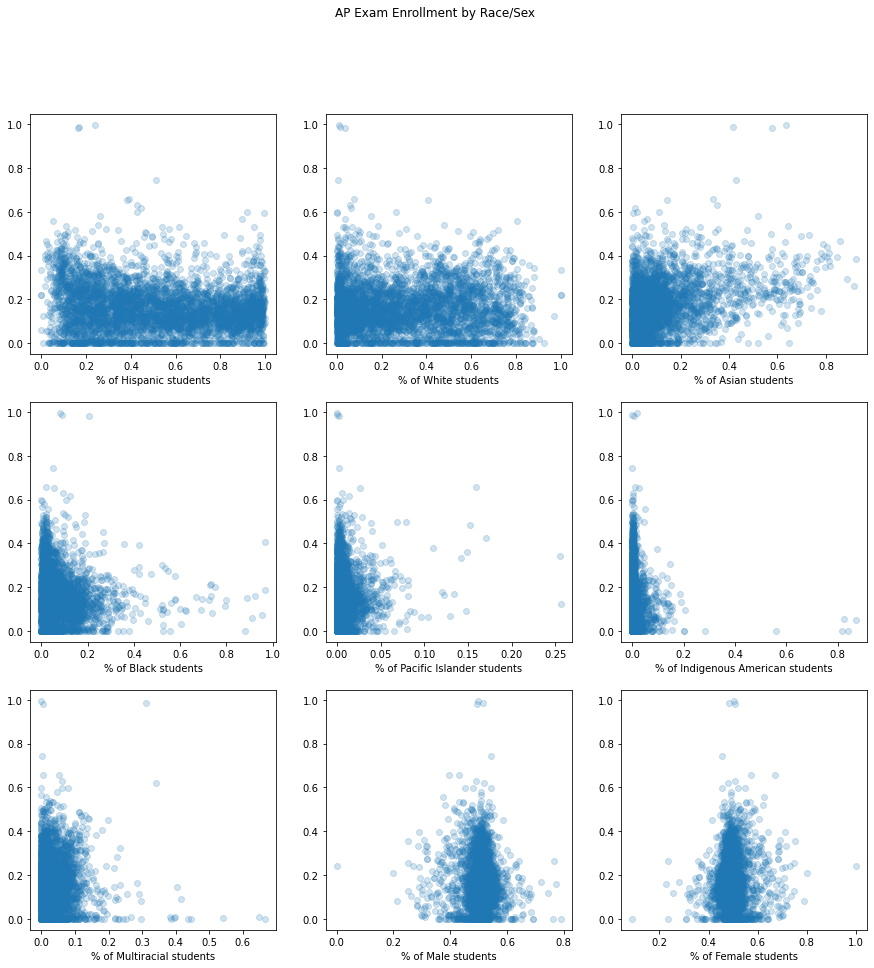

In [119]:
fig,ax = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("AP Exam Enrollment by Race/Sex")

ax[0,0].scatter(ap['%Hispanic'], ap['AP_oneormore_relative'], alpha=0.2)
ax[0,0].set_xlabel("% of Hispanic students")

ax[0,1].scatter(ap['%White'], ap['AP_oneormore_relative'], alpha=0.2)
ax[0,1].set_xlabel("% of White students")

ax[0,2].scatter(ap['%Asian'], ap['AP_oneormore_relative'], alpha=0.2)
ax[0,2].set_xlabel("% of Asian students")

ax[1,0].scatter(ap['%Black'], ap['AP_oneormore_relative'], alpha=0.2)
ax[1,0].set_xlabel("% of Black students")

ax[1,1].scatter(ap['%Pacific \nIslander'], ap['AP_oneormore_relative'], alpha=0.2)
ax[1,1].set_xlabel("% of Pacific Islander students")

ax[1,2].scatter(ap['%Indigenous \nAmerican '], ap['AP_oneormore_relative'], alpha=0.2)
ax[1,2].set_xlabel("% of Indigenous American students")

ax[2,0].scatter(ap['%Multiracial'], ap['AP_oneormore_relative'], alpha=0.2)
ax[2,0].set_xlabel("% of Multiracial students")

ax[2,1].scatter(ap['%Male'], ap['AP_oneormore_relative'], alpha=0.2)
ax[2,1].set_xlabel("% of Male students")

ax[2,2].scatter(ap['%Female'], ap['AP_oneormore_relative'], alpha=0.2)
ax[2,2].set_xlabel("% of Female students");


### Fix Teacher Salaries? 

In [32]:
# ap[ap['avg_teacher_salary'] > 150000]
# ap[ap['avg_teacher_salary'] < 3000]

# Boxplots

In [69]:
ap.columns

Index(['year', 'ncessch', 'students_AP_exam_none',
       'students_AP_exam_oneormore', 'latitude', 'longitude', 'enrollment',
       'school_name', 'AP_oneormore_relative', 'teachers_per_student',
       'security_gaurds_per_students', 'avg_teacher_salary', '%Asian',
       '%Black', '%Hispanic', '%Indigenous \nAmerican ', '%Multiracial',
       '%Pacific \nIslander', '%White', '%Female', '%Male', 'enrl_AP',
       'enrl_AP_science', 'enrl_AP_math', 'enrl_AP_other',
       'enrl_gifted_talented', 'students_SAT_ACT',
       'students_chronically_absent', 'students_report_harass_dis',
       'students_susp_in_sch', 'students_susp_out_sch_single',
       'students_susp_out_sch_multiple', 'students_arrested',
       'avg_teacher_salary_1K'],
      dtype='object')

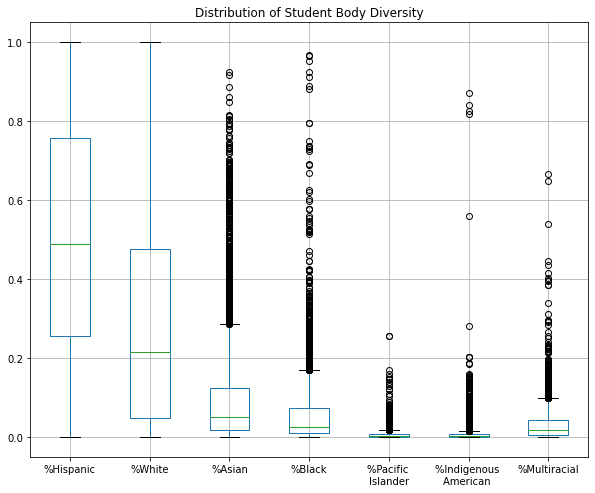

In [79]:
ap.boxplot(column = ['%Hispanic', '%White', '%Asian', '%Black', '%Pacific \nIslander', 
                     '%Indigenous \nAmerican ', '%Multiracial'], 
           figsize=(10,8)).plot()
plt.title('Distribution of Student Body Diversity');

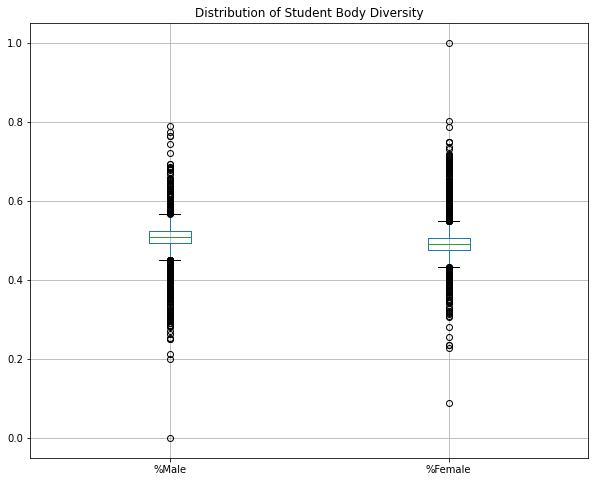

In [82]:
ap.boxplot(column = ['%Male', '%Female'], 
           figsize=(10,8)).plot()
plt.title('Distribution of Student Body Diversity');

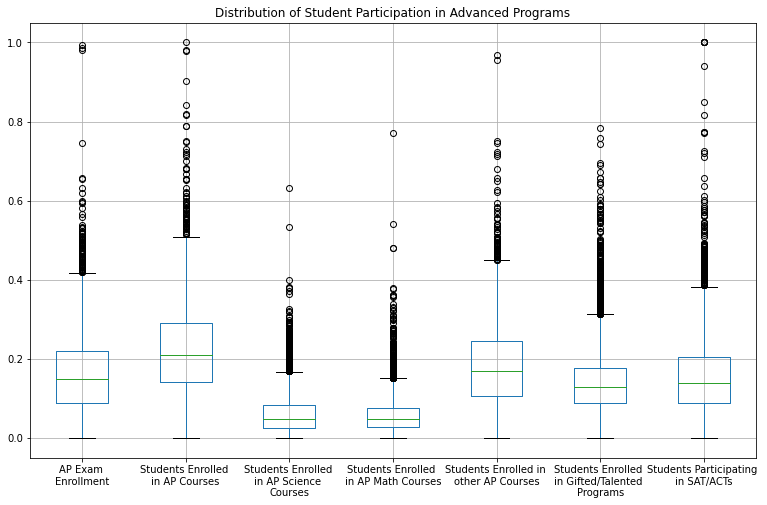

In [118]:
ap.boxplot(column = ['AP_oneormore_relative', 'enrl_AP', 'enrl_AP_science', 'enrl_AP_math', 
                     'enrl_AP_other', 'enrl_gifted_talented', 'students_SAT_ACT'], 
           figsize=(13,8)).plot()
plt.title('Distribution of Student Participation in Advanced Programs')
plt.xticks([1, 2, 3, 4, 5, 6, 7], 
           ['AP Exam \nEnrollment', 'Students Enrolled \nin AP Courses', 
            'Students Enrolled \nin AP Science \nCourses', 'Students Enrolled \nin AP Math Courses', 
            'Students Enrolled in \nother AP Courses', 'Students Enrolled \nin Gifted/Talented \nPrograms',
            'Students Participating \nin SAT/ACTs']);

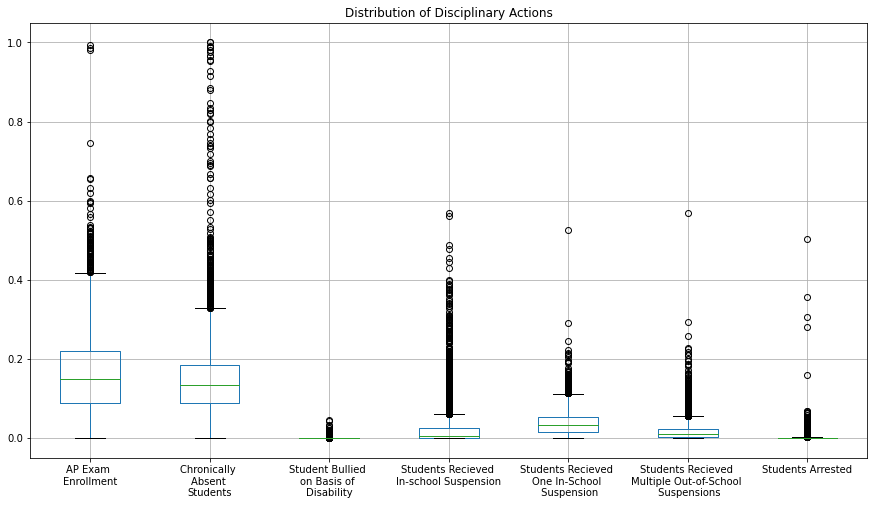

In [109]:
ap.boxplot(column = ['AP_oneormore_relative', 'students_chronically_absent', 'students_report_harass_dis',
                     'students_susp_in_sch', 'students_susp_out_sch_single',
                     'students_susp_out_sch_multiple', 'students_arrested'], 
           figsize=(15,8)).plot()
plt.title('Distribution of Disciplinary Actions')
plt.xticks([1, 2, 3, 4, 5, 6, 7], 
           ['AP Exam \nEnrollment', 'Chronically \nAbsent \nStudents', 'Students Bullied \non Basis of \nDisability',
            'Students Recieved \nIn-school Suspension', 'Students Recieved \nOne In-School \n Suspension',
                     'Students Recieved \nMultiple Out-of-School \n Suspensions', 'Students Arrested']);

In [122]:
# ap.to_csv('ap_full2.csv', index=False)